In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Importando los datos

In [65]:
dataset = pd.read_csv('..\datos_sin_procesar\Mall_Customers.csv')
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [66]:
#conociendo el dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Observando la información del dataset se puede apreciar que sólo se tiene una columna categórica y no se tienen valores faltantes

## 2. Limpieza de datos

#### 2.1 Eliminando columnas irrelevantes

In [67]:
"""Se va a eliminar la columna CustomerID, ya que no aporta información 
importante para la segmentación"""
dataset.drop(columns=['CustomerID'], inplace=True)
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### 2.2 Verificando que la columna categórica sólo contenga dos subniveles

In [68]:
dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

#### 2.3 Estudiando las variables numéricas

In [69]:
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#### 2.4 Eliminando filas repetidas

In [70]:
print('Tamaño dataset antes de eliminar filas repetidas: {}'.format(dataset.shape))
dataset.drop_duplicates(inplace=True)
print('Tamaño dataset después de eliminar filas repetidas: {}'.format(dataset.shape))

Tamaño dataset antes de eliminar filas repetidas: (200, 4)
Tamaño dataset después de eliminar filas repetidas: (200, 4)


Se puede observar que el dataset no contenía filas repetidas; se tiene la misma cantidad de registros antes y después de ejecutar `dataset.shape`

#### 2.5 Estudiando los outliers

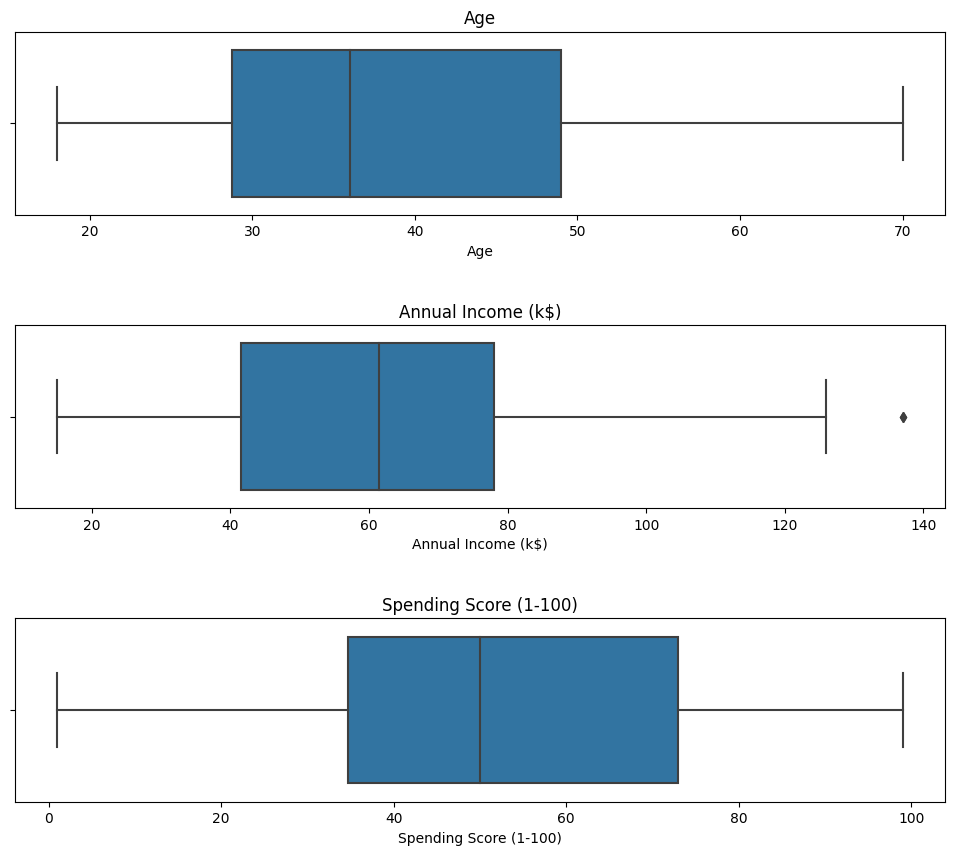

In [71]:
columnas = dataset.select_dtypes(include=['int64']).columns.to_list()
fig, ax = plt.subplots(nrows=len(columnas), ncols=1, figsize=(12,10))
fig.subplots_adjust(hspace=0.6)

for i, col in enumerate(columnas):
    sns.boxplot(x=col, data=dataset, ax=ax[i])
    ax[i].set_title(col)

Se puede apreciar que solo existe un outliers en la columna *Annual Income (k$)*; este outlier representa a una persona que tiene un ingreso anual de aproximadamente 137000 USD, por lo tanto, este outlier no será eliminado del análisis

#### 2.6 Codificando la variable categórica *Gender*

In [72]:
dataset = pd.get_dummies(data=dataset, drop_first=True).head(10)
dataset.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


#### 2.7 Guardando el dataset ya procesado

In [77]:
dataset.to_csv('..\datos_procesados\Mall_Customers_procesado.csv', index=False, sep=';')